### First we will import all our data sctructure and visualization tools

In [ ]:
import sys; sys.path.insert(0, "..") 
import os
import random
import src.visualization.utils as vis
from src.dataset.dataset import Data
from src.dataset.utils import train_test_val_split, get_balanced_initial_pool

### Lets load our data

In [ ]:
import pandas as pd
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
pd.set_option("display.precision", 2)

df = pd.read_csv("../data/unzip_filenames.csv")
df["patient_id"] = df["patient_id"].astype(int)
df["scan_id"] = df["scan_id"].astype(int)
df["label"] = df["label"].astype(str)
df.head()

In [ ]:
from src.features.convert_images_to_npy import process_cncb_data


root_dir = "../data/"
files, classes = process_cncb_data(root_dir=root_dir)
files[:5]

In [ ]:
files_extended = [x.replace("\\", "/").split("/")[2:] for x in files]
files_extended[:5]

In [ ]:
used_df = pd.DataFrame(files_extended, columns=["label", "patient_id", "scan_id", "slice"])
used_df["patient_id"] = used_df["patient_id"].astype(int)
used_df["scan_id"] = used_df["scan_id"].astype(int)
used_df["label"] = used_df["label"].astype(str)
used_df.head()

In [ ]:
new_df = pd.merge(used_df, df,  how='left', left_on=["label", "patient_id", "scan_id"], right_on = ["label", "patient_id", "scan_id"])

In [ ]:
new_df[new_df["patient_id"] == 624]

In [ ]:
new_df.groupby("label")["patient_id"].unique()

In [ ]:
x = new_df.groupby("label")["slice"].count()
x

In [ ]:
x = new_df.groupby("label")["scan_id"].nunique().plot(kind='bar', grid=False, figsize=(12,8), color=["lightgreen", "limegreen", "seagreen"], zorder=2)
# Despine
x.spines['right'].set_visible(False)
x.spines['top'].set_visible(False)
x.spines['left'].set_visible(False)

# Switch off ticks
x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = x.get_yticks()
for tick in vals:
    x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Remove title
x.set_title("")

# Set x-axis label
x.set_xlabel("Label", labelpad=20, weight='bold', size=12)

# Set y-axis label
x.set_ylabel("Number of Patients", labelpad=20, weight='bold', size=12)

# Format y-axis label
x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [ ]:
x = df[df["label", "patient_id"]]['patient_id'].value_counts().plot(kind='bar', grid=False, figsize=(12,8), color=["lightgreen", "limegreen", "seagreen"], zorder=2)
# Despine
x.spines['right'].set_visible(False)
x.spines['top'].set_visible(False)
x.spines['left'].set_visible(False)

# Switch off ticks
x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = x.get_yticks()
for tick in vals:
    x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Remove title
x.set_title("")

# Set x-axis label
x.set_xlabel("Label", labelpad=20, weight='bold', size=12)

# Set y-axis label
x.set_ylabel("Number of Scans", labelpad=20, weight='bold', size=12)

# Format y-axis label
x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [ ]:
ax = df["label"].apply(pd.value_counts).hist(bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
ax = df["label"].apply(pd.value_counts).plot(kind='hist', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
# ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Session Duration (Seconds)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Sessions", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [ ]:
print("number of patients: {}".format(len(df["patient_id"].unique())))
print("number of unique scans: {}".format(len(df["scan_id"].unique())))

In [ ]:
Data = Data(data_path="../data/NPY/data/",target_path="../data/NPY/targets/")
print("dataset length: {}".format(len(Data)))

In [ ]:
from src.features.convert_images_to_npy import process_cncb_data

root_dir = "../data/"
files, _ = process_cncb_data(root_dir=root_dir)
unique_files = list(set(files))
volume_paths = []
for path in unique_files:
    root_path = os.path.join(root_dir, path)
    if os.path.exists(root_path):
        volume_paths.append(path)

In [ ]:
files[0]

In [ ]:
files = [volume_paths[idx].split("\\") for idx in range(len(volume_paths))]

In [ ]:
df_files = pd.DataFrame(files, columns=["label", "patient_id", "scan_id"])
df_files["patient_id"] = df_files["patient_id"].astype(int)
df_files["scan_id"] = df_files["scan_id"].astype(int)
df_files["label"] = df_files["label"].astype(str)
df_files.iloc[2098]

In [ ]:
df_merged = pd.merge(df, df_files, on=["label", "patient_id", "scan_id"], how='right')
df_merged

In [ ]:
df_merged[["n_slice"]].mean()

In [ ]:
df_merged.sort_values(by=["n_slice"], ascending=False).head(2000)

In [ ]:
volume = []
for sclice in os.listdir("../data/CP/1599/4287"):
    volume.append(np.array(cv2.imread(os.path.join("../data/CP/1599/4287", sclice))))

vis.plot_slices(2, 10, 20, np.array(volume))
# vis.plot_volume(np.array(volume))

In [ ]:
X_train, X_test, X_val, y_train, y_test, y_val = train_test_val_split(Data.files, Data.lbls, train_size=.7, test_size=.2)

### Visualize the initial pool

In [ ]:
random_idx = get_balanced_initial_pool(y_train, initial_pool=3)
n_slices = 3
classes = ["CP", "NCP", "Normal"]
for idx in random_idx:
    volume, label = Data[Data.files.index(X_train[idx])]
    print(classes[label])
    vis.plot_slices(2, 10, 20, volume)

### Now lets visualize a whole volume 

In [ ]:
sys.path.insert(0, "..") 
from src.dataset.dataset import default_image_load_fn 

In [ ]:
path = "../data/CP/0/3131"

In [ ]:
volume = []
for sclice in os.listdir(path):
    volume.append(np.array(cv2.imread(os.path.join(path, sclice), cv2.IMREAD_GRAYSCALE)))
    
scan = "../data/NPY/volumes/vol_CP_0_3131.npy"
print(scan)
# volume, label = Data[random_idx]
small_volume = default_image_load_fn(scan)
vis.plot_volume([np.array(volume), small_volume])

In [ ]:
from PIL import Image

img = Image.open(r"../images/test_accuracy VS dataset_len.jpeg")
img

In [ ]:
img = Image.open(r"../images/test_accuracy.jpeg")
img

### Convolutional plots

In [ ]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

img = Image.open(r"C:\Users\Bastian\Documents\Master Mathematik\MasterArbeit\Deep Bayesian Active Learning for Covid-19 Diagnosis\TUM-THESIS\graphics\flower.jpg")
plt.imshow(img)

In [ ]:
import os
img = Image.open(os.path.join("../data/CP/0/3131", "0069.png"))
plt.imshow(img)
plt.axis('off')

In [ ]:
kernel_edge = ImageFilter.FIND_EDGES
plt.imshow(img.filter(kernel_edge))
plt.axis('off')

In [ ]:
kernel_blur = ImageFilter.BoxBlur(4)
plt.imshow(img.filter(kernel_blur))
plt.axis('off')

In [ ]:
import seaborn as sns
sns.set()
plt.plot(x, norm.pdf(x, 0, 1))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#make this example reproducible
np.random.seed(0)

from scipy.stats import norm

#x-axis ranges from -5 and 5 with .001 steps
x = np.arange(-5, 5, 0.001)

#define multiple normal distributions
plt.plot(x, norm.pdf(x, 0, 1), label='μ: 0, σ: 1', linewidth=3)
plt.plot(x, norm.pdf(x, 1, 1), label='μ: 1, σ: 1', linewidth=3)
ax = plt.gca()
# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#make this example reproducible
np.random.seed(0)

from scipy.special import kl_div
def kl(p, q):
    """Kullback-Leibler divergence D(P || Q) for discrete distributions
    Parameters
    ----------
    p, q : array-like, dtype=float, shape=n
    Discrete probability distributions.
    """

    return q * np.log(q/p)
#x-axis ranges from -5 and 5 with .001 steps
x = np.arange(-5, 5, 0.001)

#define multiple normal distributions
plt.plot(x, kl(norm.pdf(x, 1, 1), norm.pdf(x, 0, 1)), linewidth=3)
ax = plt.gca()
# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.legend()
plt.fill_between(x, kl(norm.pdf(x, 1, 1), norm.pdf(x, 0, 1)), step="pre", alpha=0.4)
plt.show()

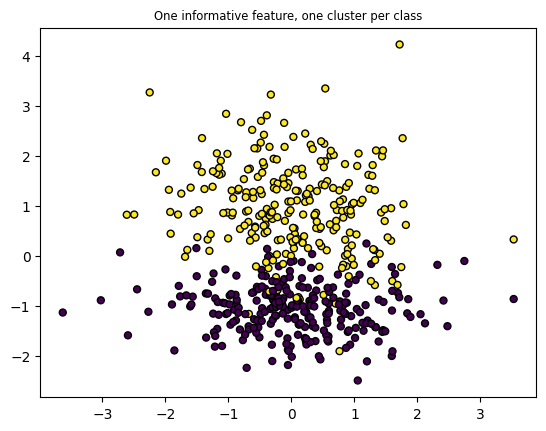

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

plt.title("One informative feature, one cluster per class", fontsize="small")
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, n_samples=500
)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

In [2]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X1, Y1)

SVC()

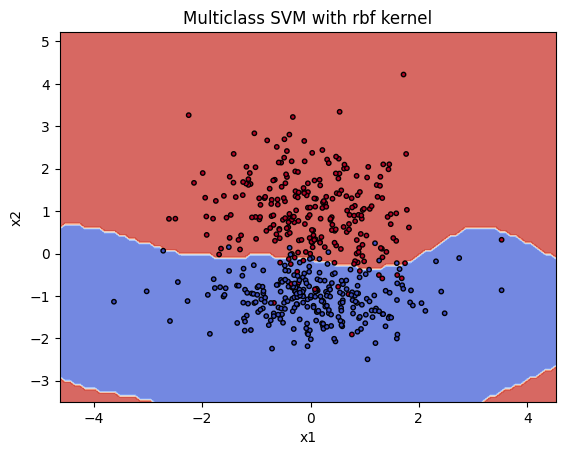

In [3]:
from sklearn.inspection import DecisionBoundaryDisplay
fig = plt.figure()
ax = fig.gca()

kernel='rbf'

disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X1,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="x1",
        ylabel="x2",
    )
ax.scatter(X1[:,0], X1[:,1], c=Y1, cmap=plt.cm.coolwarm, s=10, edgecolors="k")
ax.set_title(f"Multiclass SVM with {kernel} kernel")    
plt.show()

In [4]:
import torch

class DropoutNet(torch.nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super(DropoutNet, self).__init__(*args, **kwargs)

        self.model = torch.nn.Sequential(
            torch.nn.Linear(2, 5),
            torch.nn.ReLU(),
            # torch.nn.Dropout(.05),
            torch.nn.Linear(5, 5),
            torch.nn.ReLU(),
            # torch.nn.Dropout(.05),
            torch.nn.Linear(5, 1)
        )
        
    def forward(self, x):
        return self.model(x)

In [5]:
from torch.utils.data import TensorDataset, DataLoader

tensor_x = torch.from_numpy(X1).to(torch.float32) # transform to torch tensor
tensor_y = torch.from_numpy(Y1).to(torch.float32)

my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
my_dataloader = DataLoader(my_dataset, batch_size=12) # create your dataloader

In [27]:
model = DropoutNet().to("cuda")
from torch import optim

optimizer = optim.Adam(model.parameters(), lr=1)
criterion = torch.nn.BCEWithLogitsLoss()
losses = []
for epoch in range(10):
    model.train()
    running_loss = 0
    correct = 0
    for x, y in my_dataloader:
        optimizer.zero_grad()
        x = x.cuda()
        y = y.cuda()
        output = model(x)
        loss = criterion(output.flatten(), y)
        correct += (torch.argmax(output)==y).sum()
        # print(torch.argmax(output, dim=1))
        # print(y)
        # print((torch.argmax(output, dim=1)==y).sum())
        # clear gradients for this training step
        running_loss += loss.item() 
        # backpropagation, compute gradients
        loss.backward()  # apply gradients
        optimizer.step()
        losses.append(running_loss)
    print("Epoch [{}/{}], Loss: {}, Accuracy: {}".format(epoch+1, 10, running_loss/500, correct/500))


Epoch [1/10], Loss: 0.05968715478107333, Accuracy: 0.3720000088214874
Epoch [2/10], Loss: 0.0239261812902987, Accuracy: 0.33800002932548523
Epoch [3/10], Loss: 0.022622588261961937, Accuracy: 0.3100000023841858
Epoch [4/10], Loss: 0.022839155290275814, Accuracy: 0.3240000009536743
Epoch [5/10], Loss: 0.023552227139472963, Accuracy: 0.3240000009536743
Epoch [6/10], Loss: 0.024904633052647115, Accuracy: 0.3100000023841858
Epoch [7/10], Loss: 0.026396686006337405, Accuracy: 0.3140000104904175
Epoch [8/10], Loss: 0.023454507671296598, Accuracy: 0.3240000009536743
Epoch [9/10], Loss: 0.02321061082184315, Accuracy: 0.3240000009536743
Epoch [10/10], Loss: 0.023153593480587004, Accuracy: 0.3240000009536743


In [ ]:
def show_loss(losses):
    plt.figure(figsize=(12, 8))
    plt.plot(range(len(losses)), losses)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.show()

show_loss(losses)